# 3.3: Evaluation methods of k-NN

### As seen in the hierarchical clustering plot we often get different labels when finding the nearest neighbors of different ciphers. This indicates that we are not completely sure about our estimation. Until now, in k-NN we have simply used the one with most votes. But we can also exclude predictions which does not have enough of the same labels. In k-NN we can set the “l” to the minimum number of “k” nearest neighbors of the strongest label to accept a match.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
sys.path.append("..")

from knn.knn_algorithm import knnParamSearch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from typing import List
from sklearn import neighbors
from sklearn.metrics import confusion_matrix


from utils import data_utils
from utils import vis_utils


In [2]:
data_csv = pd.read_csv("../data.csv", header=None)
data = pd.DataFrame.to_numpy(data_csv)

np.random.shuffle(data)
data = np.delete(data, 0, 1) # remove index numbers 
data_raw = np.delete(data,np.s_[0:2],axis=1) # contains only raw data, no labels or student id

train_pct = 0.8
test_pct  = 0.2

# Training data from one student
d_train = data[:int(train_pct*len(data)), :]
l_train = data[:int(train_pct*len(data)), 1]
d_train = np.delete(d_train, [0, 1], 1)

# Test data from another student
d_test = data[int(train_pct*len(data)):, :]
l_test = data[int(train_pct*len(data)):, 1]
d_test = np.delete(d_test, [0, 1], 1)

print("data.shape \t= ", data.shape, "\nd_train.shape \t= ", d_train.shape, "\nl_train.shape \t= ",l_train.shape, "\nd_test.shape \t= ", d_test.shape, "\nl_test.shape \t= ", l_test.shape)

data.shape 	=  (66000, 531) 
d_train.shape 	=  (52800, 529) 
l_train.shape 	=  (52800,) 
d_test.shape 	=  (13200, 529) 
l_test.shape 	=  (13200,)


In [2]:
train_pct = 0.8
data = pd.read_csv("../data.csv", header=None)
data = pd.DataFrame.to_numpy(data)
data = np.delete(data, 0, 1)
np.random.shuffle(data)

data = data[data[:,0] < 10]
d_train, l_train, d_test, l_test = data_utils.split_data_all(data, train_pct)
print("data.shape \t= ", data.shape, "\nd_train.shape \t= ", d_train.shape, "\nl_train.shape \t= ",l_train.shape, "\nd_test.shape \t= ", d_test.shape, "\nl_test.shape \t= ", l_test.shape)

data.shape 	=  (18000, 531) 
d_train.shape 	=  (14400, 529) 
l_train.shape 	=  (14400,) 
d_test.shape 	=  (3600, 529) 
l_test.shape 	=  (3600,)



### 3.3.1 Plot the precision-recall curves for 1 to 13 “k” with “l” values up to the “k” value. Here, the results should be one plot containing “k” lines, and each one have “k” datapoints.

In [3]:
# A = np.ndarray((100,1))
# print(A.shape)
# most_frequent_element = np.bincount().argmax()
# print(most_frequent_element)


In [3]:
precision = np.full((13,13), -1, dtype=float)
recall = np.full((13,13), -1, dtype=float)
incl_pred = np.full((13,13), -1, dtype=int)
for k in range(1,13 + 1):
    print("k = ", k, '        ')
    knn = neighbors.KNeighborsClassifier(k, weights='uniform', algorithm='brute', metric='euclidean')
    knn.fit(d_train,l_train)
    neigh_dist, neigh_ind = knn.kneighbors(d_test)
    neighbor_labels = l_train[neigh_ind]


    for l in range(1,k + 1):
        # print(" l = ",l,'        ', end='\r')
        print(" l = ",l)
        
        predicted_labels = []
        for i in range(0,len(neighbor_labels)):
            # print("\t\ti = ",i)
            
            most_frequent_element = np.bincount(neighbor_labels[i]).argmax()

            dpi_label = 0
            if ((neighbor_labels[i] == most_frequent_element).sum() >= l):
                dpi_label = most_frequent_element
            else:
                dpi_label = -1
            predicted_labels.append(dpi_label)
        
        # None_indx = [i for i in range(len(predicted_labels)) if predicted_labels[i] == -1]
        # predicted_labels = np.delete(predicted_labels,None_indx)
        # l_test = np.delete(l_test,None_indx)
        
        
        np.set_printoptions(threshold=sys.maxsize)

        # file = open("None_indx.txt", "w+")
        # file.write(str(None_indx))
        # file.close()

        # file = open("predicted_labels.txt", "w+")
        # file.write(str(predicted_labels))
        # file.close()

        # file = open("a.txt", "w+")
        # file.write(str(a))
        # file.close()

        # file = open("b.txt", "w+")
        # file.write(str(b))
        # file.close()
        #print("len(a) =", len(a), '\tlen(b) =', len(b))
        #print('a:',a,'\nb:',b)
        
        pred_lab = np.array(predicted_labels)

        conf_mat = confusion_matrix(predicted_labels, l_test)
        # print("Conf_mat shape:", conf_mat.shape)
        conf_mat = conf_mat.T
        if conf_mat.shape == (11,11):
            conf_mat = conf_mat[1:,:]
        else:
            conf_mat = np.c_[np.zeros((10,1)), conf_mat]
        
        prec = []
        rec = []
        for i in range(10):
            denum = np.sum(conf_mat[:,i+1])
            if denum == 0:
                prec.append(0)
            else:
                prec.append(conf_mat[i,i+1] / denum)

            denum = np.sum(conf_mat[i,:])
            if denum == 0:
                rec.append(0)
            else:
                rec.append(conf_mat[i,i+1] / denum)
        # print('recalls:\n', rec)
        precision[k-1, l-1] = np.mean(prec)
        recall[k-1, l-1] = np.mean(rec)
        incl_pred[k-1, l-1] = pred_lab[pred_lab != -1].shape[0]
        # print('recall mean:\n', recall[k-1,l-1])

file = open("precision.txt", "w+")
file.write(str(precision))
file.close()
file = open("recall.txt", "w+")
file.write(str(recall))
file.close()

print(incl_pred)


k =  1         
 l =  1
k =  2         
 l =  1
 l =  2
k =  3         
 l =  1
 l =  2
 l =  3
k =  4         
 l =  1
 l =  2
 l =  3
 l =  4
k =  5         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
k =  6         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
k =  7         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
k =  8         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
 l =  8
k =  9         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
 l =  8
 l =  9
k =  10         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
 l =  8
 l =  9
 l =  10
k =  11         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
 l =  8
 l =  9
 l =  10
 l =  11
k =  12         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
 l =  8
 l =  9
 l =  10
 l =  11
 l =  12
k =  13         
 l =  1
 l =  2
 l =  3
 l =  4
 l =  5
 l =  6
 l =  7
 l =  8
 l =  9
 l =  10
 l =  11
 l =  12
 l =  13
[[13200    -1    -1    -1    -1    -1    -1    -1 

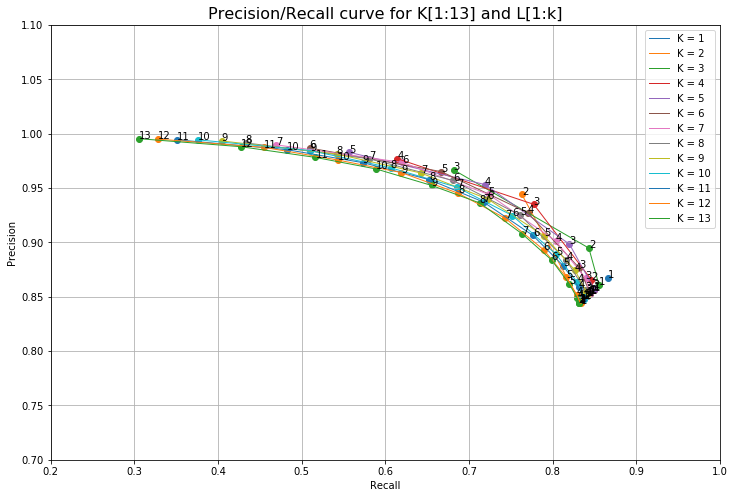

In [8]:
pr_x = []
pr_y = []

fig, ax = plt.subplots(1,1,figsize=(12,8))

for i in range(13):
    pr_x.append(recall[i,:i+1])
    pr_y.append(precision[i,:i+1])

    lbl = 'K = ' + str(i+1)
    ax.scatter(recall[i,:i+1], precision[i,:i+1])
    ax.plot(recall[i,:i+1], precision[i,:i+1], linewidth=1.0, marker='.', markersize=0, label=lbl)

for i in range(13):
    for j in range(i+1):
        lbl = 'L'+str(j+1)
        plt.annotate(str(j+1), (recall[i,j], precision[i,j]))


ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title("Precision/Recall curve for K[1:13] and L[1:k]", fontsize=16)
plt.ylim(0.7, 1.1)
plt.xlim(0.2, 1)
ax.legend()
ax.grid()
plt.show()

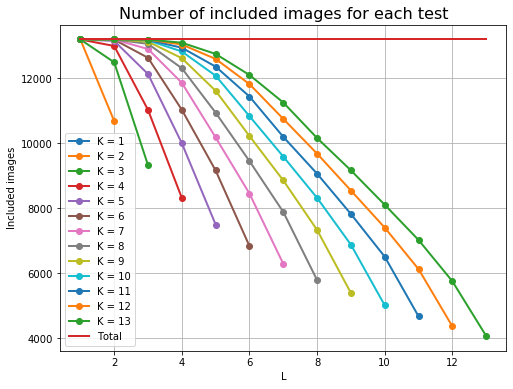

In [5]:

fig, ax = plt.subplots(1,1,figsize=(8,6))

for i in range(13):
    lbl = 'K = ' + str(i+1)
    ax.plot(range(1,2+i), incl_pred[i,:i+1], linewidth=2.0, marker='.', markersize=12, label=lbl)

ax.plot(range(1,14), [l_test.shape[0]]*13, linewidth=2.0, marker='.', markersize=0, label="Total")

ax.set_xlabel('L')
ax.set_ylabel('Included images')
ax.set_title("Number of included images for each test", fontsize=16)
# plt.ylim(0, 1)
# plt.xlim(0, 1)
ax.legend()
ax.grid()
plt.show()

### 3.3.2 Plot the maximum F1 values for each of the k in a plot together. With F1 score on the y- axis and “k”-value on the x-axis.

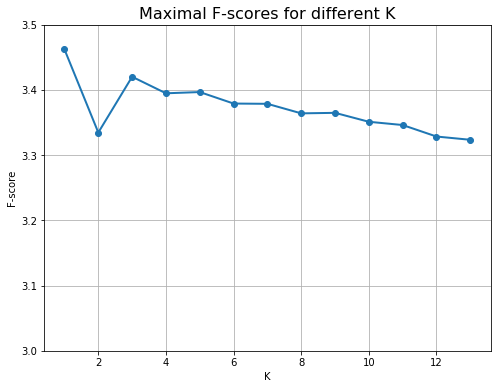

In [6]:
Fscores = np.full((13,13), -1, dtype=float)

for i in range(13):
    for j in range(i+1):
        Fscores[i,j] = 2 * ((precision[i,j] * recall[i,j]) / precision[i,j] + recall[i,j])

Fscores_max = np.amax(Fscores, axis=1)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,14), Fscores_max, linewidth=2.0, marker='.', markersize=12)

ax.set_xlabel('K')
ax.set_ylabel('F-score')
ax.set_title("Maximal F-scores for different K", fontsize=16)
ax.grid()
plt.ylim(3, 3.5)
plt.show()


### 3.3.3 Discuss the results from 3.3.1 and 3.3.2. What do you think would be the most important part of a digit recognition system. Precision or recall? Please discuss in what situations would the different factors be more important?